# Урок 8

## Задание 2

Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

Подключим необходимые библиотеки

In [1]:
import numpy as np

from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

Загрузим датасет ирисов Фишера

In [2]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

Посмотрим на компонентный график датасета на основе 1 и 2 компоненты

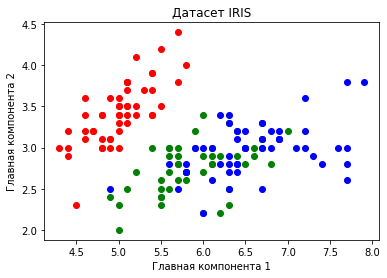

In [3]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y==i, 0], X[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Датасет IRIS')
plt.show()

Произведем разделение на обучающую и тестовую выборки

In [4]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

Построим модель классификации на основе Стохастического градиентного спуска

In [5]:
model = linear_model.SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



Посмотрим, как отработала наша модель

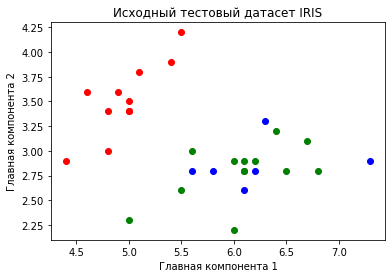

In [6]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(test_data[test_labels==i, 0], test_data[test_labels==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Исходный тестовый датасет IRIS')
plt.show()

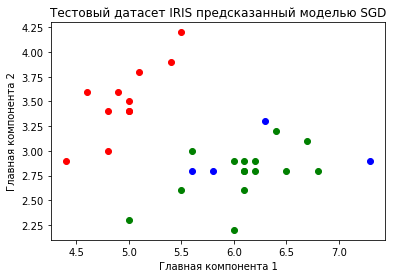

In [7]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(test_data[model_predictions==i, 0], test_data[model_predictions==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Тестовый датасет IRIS предсказанный моделью SGD')
plt.show()

**Теперь применим метод главных компонент (PCA) через сингулярное разложение и попробуем снова обучить модель**

In [8]:
U, S, Vh = np.linalg.svd(X)

In [9]:
S

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

Как видно из разложения, наибольшими сингулярными числами являются первые 2 значения

In [10]:
Vh

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

Построим матрицу W как 2 первых собственных вектора, которые соответствуют максимальными собственным числам сингулярного разложения

In [11]:
W = Vh[0:4,0:2]
W

array([[-0.75110816, -0.38008617],
       [ 0.2841749 ,  0.5467445 ],
       [ 0.50215472, -0.67524332],
       [ 0.32081425, -0.31725607]])

Получим новую матрицу "Объекты-признаки"

In [12]:
Z = X.dot(W)

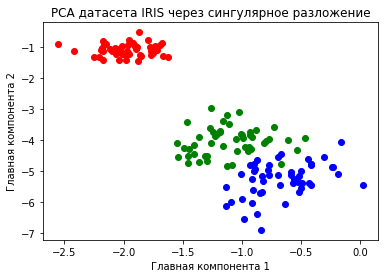

In [13]:
plt.figure()

for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS через сингулярное разложение')
plt.show()

**Попробуем обучить нашу модель на основе Стохастического градиентного спуска с новыми данными**

Произведем разделение на обучающую и тестовую выборки

In [18]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(Z, y, test_size=0.2, random_state=3)

Построим модель классификации на основе Стохастического градиентного спуска

In [19]:
model = linear_model.SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Посмотрим, как отработала наша модель

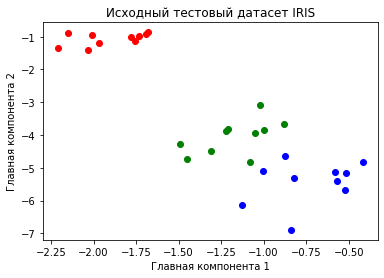

In [20]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(test_data[test_labels==i, 0], test_data[test_labels==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Исходный тестовый датасет IRIS')
plt.show()

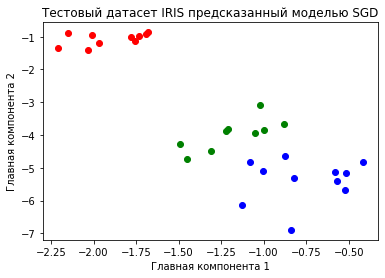

In [21]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(test_data[model_predictions==i, 0], test_data[model_predictions==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Тестовый датасет IRIS предсказанный моделью SGD')
plt.show()

В результате применения сингулярного разложения на тех же данных, что и в предыдущем задании, получаем намного хуже качество обучения. Всего 56.7% точности. Однако, если поиграться с выборками, то можно получить вообще идеальное обучение и предсказания. К примеру, в случае с random_state=0 при разделении данных на тестовую и тренировочную выборки, мы получаем 100% попадание. Если указать значение random_state=3, то получаем 96,7% точности на обучаемой выборке.

В общем здесь также желательно применить кросс-валидацию, чтобы получить более адекватную модель. Ну и данных конечно надо бы побольше.

Вопрос только по предупреждениям, когда обучается модель. Что ему не нравится не очень понял:)